# Objetivos e tipos de análises

O objetivo desse estudo é analisar os dados abertos publicados pela PRF em 2023, analisar como as bases são construídas, entender as estrutura dos dados e compreender como os dados podem ser explorados e analisados em diversos contextos. A seguir citarei alguns tipos das análises alvo deste estudo e exemplos.

### Análise exploratória
* Estatísticas descritivas básicas, como média, mediana e desvio padrão.

### Análise temporal
* Quantidades de ocorrências por mês/ano [OK]
* Dias da semana com maiores ocorrências
* Horários com maiores ocorrências

### Análise geográfica
* Estados com maiores números de ocorrências
* Municípios com maiores ocorrências
* Simulação em mapa

### Insights buscados
* Identificar pontos de atenção em rodovias
* Sugerir medidas preventivas com base em causas comuns
* Avaliar a necessidade de melhorias em certas vias ou trechos específicos

### Referências
* Todos os dados utilizados foram retirados diretamente do repositório público da PRF: [Dados abertos 2023](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf).

Créditos a orientação do estudo de caso [Bruno Jardim](https://www.instagram.com/bruno.jardim_pod/)
* As orientações foram observadas em uma amostra de sua mentoria de dados no Instagram.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

In [12]:
df_ocorrencias = pd.read_csv('datatran2023.csv', encoding='Latin-1', sep=';')
df_pessoas = pd.read_csv('acidentes2023.csv', encoding='Latin-1', sep=';')

In [13]:
df_ocorrencias

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38403,541876,2023-03-13,segunda-feira,18:10:00,ES,101.0,"293,6",CARIACICA,Ausência de sinalização,Atropelamento de Pedestre,...,1,1,0,1,1,"-20,32415948","-40,3952903",SPRF-ES,DEL01-ES,UOP01-DEL01-ES
38404,542057,2023-07-29,sábado,10:00:00,GO,60.0,"164,8",GOIANIA,Velocidade Incompatível,Colisão traseira,...,0,2,0,0,2,"-16,7036","-49,342",SPRF-GO,DEL01-GO,UOP02-DEL01-GO
38405,542058,2023-07-08,sábado,18:50:00,PR,116.0,1,CAMPINA GRANDE DO SUL,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,4,1,"-25,06368403","-48,57051896",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
38406,542112,2023-06-22,quinta-feira,05:25:00,MG,381.0,"746,5",TRES CORACOES,Condutor Dormindo,Saída de leito carroçável,...,0,53,0,1,1,"-21,618761","-45,262445",SPRF-MG,DEL16-MG,UOP02-DEL16-MG


In [17]:
tipos = df_ocorrencias['tipo_acidente'].value_counts()

In [18]:
tipos

Colisão traseira                  7346
Saída de leito carroçável         5800
Colisão transversal               4879
Colisão lateral mesmo sentido     3878
Tombamento                        3211
Colisão com objeto                2809
Colisão frontal                   2650
Atropelamento de Pedestre         1802
Queda de ocupante de veículo      1748
Colisão lateral sentido oposto    1156
Capotamento                        833
Incêndio                           752
Engavetamento                      680
Atropelamento de Animal            629
Eventos atípicos                   173
Derramamento de carga               62
Name: tipo_acidente, dtype: int64

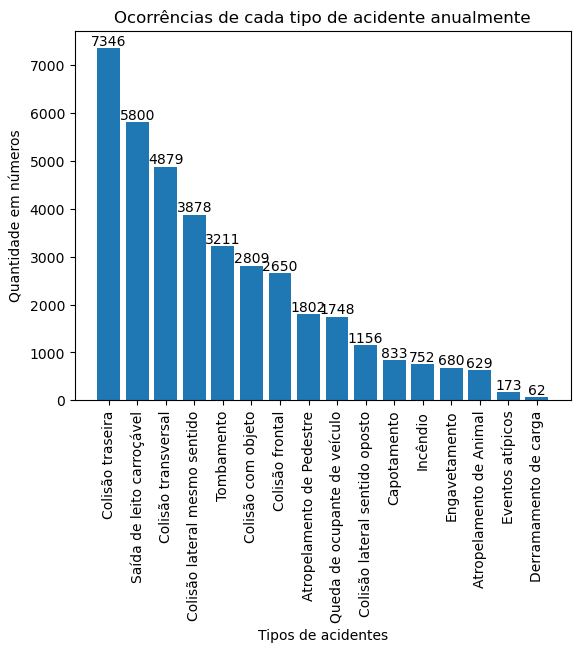

In [155]:
fig, ax = plt.subplots()
ax.bar(tipos.index, tipos.values)
ax.set_title('Ocorrências de cada tipo de acidente anualmente')
ax.set_xlabel('Tipos de acidentes')
ax.xaxis.set_major_locator(FixedLocator(range(len(tipos))))
ax.set_xticklabels(tipos.index, rotation=90)
ax.set_ylabel('Quantidade em números')
for i, value in enumerate(tipos):
    ax.text(i, value, str(value), ha='center', va='bottom')
plt.show()

In [153]:
def ocorrencias_mes(mes):
    if(mes in df_ocorrencias['data_inversa'].dt.month.values):
        df_filtrado = df_ocorrencias[df_ocorrencias['data_inversa'].dt.month == mes]
        tipos = df_filtrado['tipo_acidente'].value_counts()
        fig, ax = plt.subplots()
        ax.bar(tipos.index, tipos.values)
        ax.set_title('Ocorrências de cada tipo de acidente no mês '+str(mes))
        ax.set_xlabel('Tipos de acidentes')
        ax.xaxis.set_major_locator(FixedLocator(range(len(tipos))))
        ax.set_xticklabels(tipos.index, rotation=90)
        ax.set_ylabel('Quantidade em números')
        for i, value in enumerate(tipos):
            ax.text(i, value, str(value), ha='center', va='bottom')
        plt.show()
    else:
        print('O mês '+str(mes)+' não consta na base de dados.')

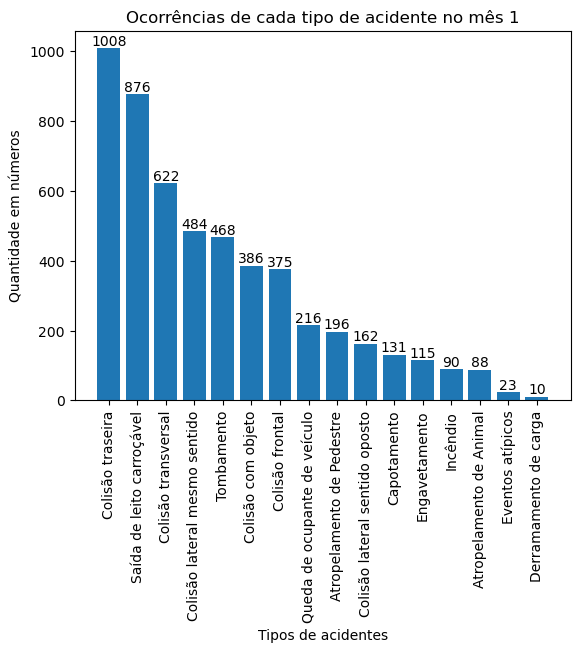

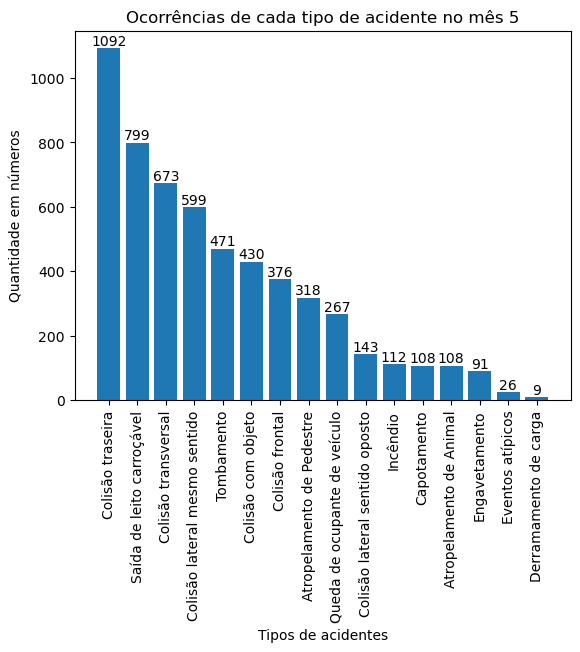

In [154]:
# Nesse exemplo podemos analisar um gráfico de barras com as ocorrências nos meses de janeiro e maio
ocorrencias_mes(1)
ocorrencias_mes(5)

O mês com mais ocorrências é o mês 7


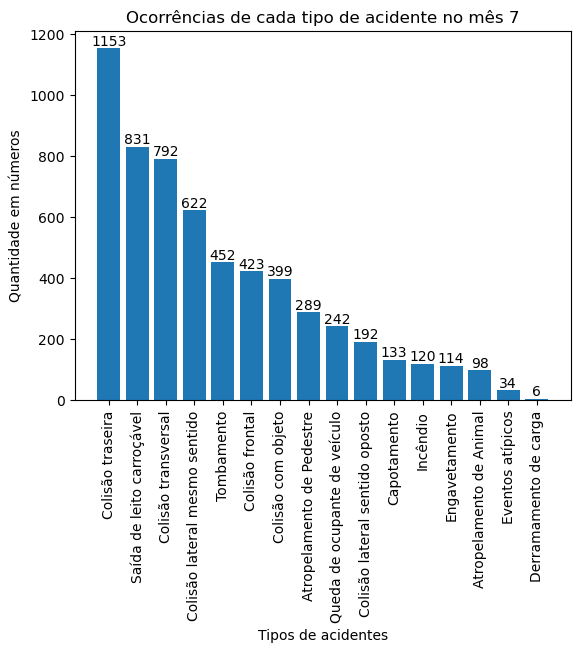

In [158]:
# Qual mês mais existem ocorrências?
cont = df_ocorrencias['data_inversa'].dt.month.value_counts()
max_month = cont.idxmax()
print('O mês com mais ocorrências é o mês '+str(max_month))
ocorrencias_mes(max_month)